<ipython-input-31-b75bd6ba4141>:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


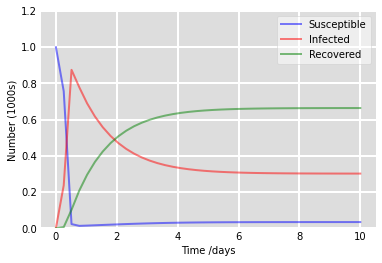

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### See https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
## which is a different model but you see the essential features

# Total population.
N = 1000
# Initial number infected and recovered, I0, R0.
I0, R0 = 1, 0
# Initial susceptibles S0.
S0 = N - I0 - R0
# birth/death rate, infection coefficient, recovery rate, interaction coefficient, (in 1/days).
delta, gamma, r, k = 0.25, 1.55, 0.55, 0.005 
# A grid of time points (in days)
t = np.linspace(0, 10, 40)

# The SIR model differential equations.
def deriv(y, t, N, delta, gamma, r, k):
    S, I, R = y
    dSdt = delta*(N-S) - gamma*k*I*S
    dIdt = gamma*k*I*S  - (r+delta)*I
    dRdt = r*I - delta*R
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, delta, gamma, r, k))
S, I, R = ret.T

##print(R)

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()